Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kagglejson/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/face-mask-detection


 95% 379M/398M [00:01<00:00, 228MB/s]
100% 398M/398M [00:01<00:00, 214MB/s]


In [ ]:
!unzip /content/face-mask-detection.zip

Archive:  /content/face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotation

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 12445, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 12445 (delta 0), reused 3 (delta 0), pack-reused 12441
Receiving objects: 100% (12445/12445), 11.54 MiB | 33.67 MiB/s, done.
Resolving deltas: 100% (8665/8665), done.
/content/yolov5
     |████████████████████████████████| 596 kB 10.0 MB/s 


Since the data is in XML format, converting it into Yolo format

In [ ]:
# !mkdir /kaggle/working/annotaions_yolo

In [ ]:
!mkdir '/content/yolo_annotations'

In [ ]:
import xml.etree.ElementTree as ET
import os

In [ ]:
CLASSES = ['with_mask', 'without_mask', 'mask_weared_incorrect']

In [ ]:
inp_path = '/content/maksssksksss1.xml'
out_path = '/content/fd.txt'
try:
    inp = open(inp_path,'r')
    out = open(out_path, 'w')
    tree = ET.parse(inp)
    label_flag = False
    for ele in tree.iter():
        if ele.tag == 'size':
            img_w = int(ele.find('width').text)
            img_h = int(ele.find('height').text)
        if ele.tag == 'object':
            label_flag = True
            name = ele.find('name').text
            class_id = CLASSES.index(name)
            xml_box = ele.find('bndbox')
            xmin = float(xml_box.find('xmin').text)
            xmax = float(xml_box.find('xmax').text)
            ymin = float(xml_box.find('ymin').text)
            ymax = float(xml_box.find('ymax').text)
            bbox1 = (xmin,xmax,ymin,ymax)
            bbox2 = yolo_bounding_box(bbox1,(img_w,img_h))
            print(f"bbox2 {bbox2}")
            out.write(str(class_id) + ' ' + ' '.join([str(s) for s in bbox2]) + '\n')

finally:
    inp.close()
    out.close()

bbox2 (0.84375, 0.330128, 0.0825, 0.224359)
bbox2 (0.60625, 0.355769, 0.0925, 0.224359)
bbox2 (0.7675, 0.445513, 0.04, 0.147436)
bbox2 (0.39625, 0.605769, 0.0775, 0.262821)
bbox2 (0.21125, 0.538462, 0.0525, 0.192308)
bbox2 (0.515, 0.512821, 0.075, 0.166667)
bbox2 (0.08125, 0.532051, 0.0575, 0.128205)
bbox2 (0.95875, 0.541667, 0.0725, 0.185897)
bbox2 (0.2425, 0.464744, 0.07, 0.211538)


In [ ]:
def yolo_bounding_box(box,img_size):
    dw = 1. / (img_size[0])
    dh = 1. / (img_size[1])
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = round(x * dw, 6)
    w = round(w * dw, 6)
    y = round(y * dh, 6)
    h = round(h * dh, 6)
    return (x,y,w,h)
def convert_annotations(xml_path,yolo_path):
    file_input = open(xml_path,'r')
    tree = ET.parse(file_input)
    has_label = False
    file_output = open(yolo_path,'w')
    for element in tree.iter():
        if element.tag == 'size':
            width  = int(element.find('width').text)
            height = int(element.find('height').text)
            img_size_tuple = (width,height)
        
        if element.tag == 'object':
            has_label = True
            name = element.find('name').text
            xml_box = element.find('bndbox')
            class_id = CLASSES.index(name)
            xmin = float(xml_box.find('xmin').text)
            xmax = float(xml_box.find('xmax').text)
            ymin = float(xml_box.find('ymin').text)
            ymax = float(xml_box.find('ymax').text)
            bbox1 = (xmin,xmax,ymin,ymax)
            bbox2 = yolo_bounding_box(bbox1,(width,height))
            file_output.write(str(class_id) + ' ' + ' '.join([str(s) for s in bbox2]) + '\n')
    if not has_label:
        print(xml_path)        
    file_input.close()
    file_output.close()

In [ ]:
xml_base = '/content/annotations'
yolo_base = '/content/yolo_annotations'
xml_files = os.listdir(xml_base)
for xml_file in xml_files:
    yolo_file = xml_file.split('.')[0] + '.txt'
    convert_annotations(os.path.join(xml_base, xml_file), os.path.join(yolo_base, yolo_file))

In [ ]:
!cp -r /content/yolo_annotations /content/drive/MyDrive/datasets/face_mask_detection_using_yolov5

^C


In [ ]:
len(os.listdir(yolo_base))

853

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
all_files = os.listdir("/content/images")
len(all_files)

853

In [ ]:
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=1337)
val_files, test_files =  train_test_split(test_files, test_size=0.5, random_state=1337)

In [ ]:
print('Train files:', len(train_files))
print('Val files:', len(val_files))
print('Test files:', len(test_files))

Train files: 682
Val files: 85
Test files: 86


In [ ]:
import shutil
import tqdm

In [ ]:
pwd

'/content/yolov5'

In [ ]:
!mkdir facemask
%ls

CONTRIBUTING.md  export.py   models/            train.py        yolov5m.pt
data/            facemask/   README.md          tutorial.ipynb
detect.py        hubconf.py  requirements.txt*  utils/
Dockerfile       LICENSE     setup.cfg          val.py


In [ ]:
!mkdir -p facemask/train/images
!mkdir -p facemask/train/labels
!mkdir -p facemask/val/images
!mkdir -p facemask/val/labels
!mkdir -p facemask/test/images
!mkdir -p facemask/test/labels

In [ ]:
img_base = '/content/images'

In [ ]:
def move_files(files, type='train'):
    for file in tqdm.tqdm(files):
        img_src = os.path.join(img_base, file)
        ann_src = os.path.join(yolo_base, file.split('.')[0] + '.txt')
        img_dst = 'facemask/' + type +'/images/' + file
        ann_dst = 'facemask/' + type +'/labels/' + file.split('.')[0] + '.txt'
        shutil.copy(img_src, img_dst)
        shutil.copy(ann_src, ann_dst)
    print('Complete move', type, 'files')

In [ ]:
move_files(train_files, 'train')
move_files(test_files, 'test')
move_files(val_files, 'val')

100%|██████████| 682/682 [00:00<00:00, 1028.52it/s]


Complete move train files


100%|██████████| 86/86 [00:00<00:00, 1283.25it/s]


Complete move test files


100%|██████████| 85/85 [00:00<00:00, 394.36it/s]

Complete move val files


In [ ]:
yaml_text = """train: facemask/train/images
val: facemask/val/images

nc: 3
names: ['with_mask', 'without_mask', 'incorrect_mask']"""

In [ ]:
with open("facemask.yaml", 'w') as f:
    f.write(yaml_text)

In [ ]:
%cat facemask.yaml

train: facemask/train/images
val: facemask/val/images

nc: 3
names: ['with_mask', 'without_mask', 'incorrect_mask']

In [ ]:
!cp /content/drive/MyDrive/datasets/face_mask_detection_using_yolov5/yolov5m.pt /content/yolov5/yolov5m.pt

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
start = datetime.now()
!python train.py --img 640 --batch 32 --epochs 100 --data facemask.yaml --weights yolov5m.pt
end = datetime.now()
print('Trainine time:', end - start)

train: weights=yolov5m.pt, cfg=, data=facemask.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-95-gea72b84 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=

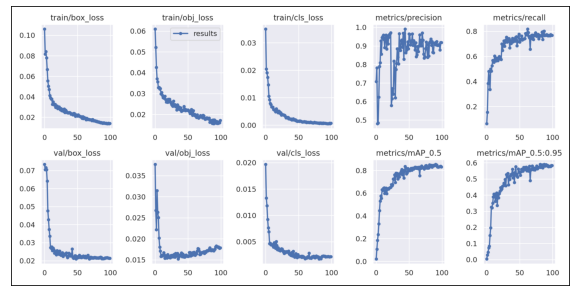

In [ ]:
res_path = 'runs/train/exp/results.png'
plt.figure(figsize=(10, 10))
img = plt.imread(res_path)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
def show_images(path, num=5):
    cnt = 0
    for file in os.listdir(path):
        img = plt.imread(os.path.join(path, file))
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        if cnt == num:
            break
        plt.xticks([])
        plt.yticks([])
        plt.show()
        cnt += 1

In [ ]:
!python detect.py --source facemask/test/images/ --weight runs/train/exp/weights/best.pt --img 640 --conf 0.4

detect: weights=['runs/train/exp/weights/best.pt'], source=facemask/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-95-gea72b84 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 290 layers, 20861016 parameters, 0 gradients, 48.0 GFLOPs
image 1/86 /content/yolov5/facemask/test/images/maksssksksss107.png: 640x512 1 with_mask, Done. (0.012s)
image 2/86 /content/yolov5/facemask/test/images/maksssksksss128.png: 640x512 1 without_mask, Done. (0.011s)
image 3/86 /content/yolov5/facemask/test/images/maksssksksss134.png: 384x640 5 with_masks, 2 without_masks, 1 incorrect_mask, Done. (0.013s)
image 4

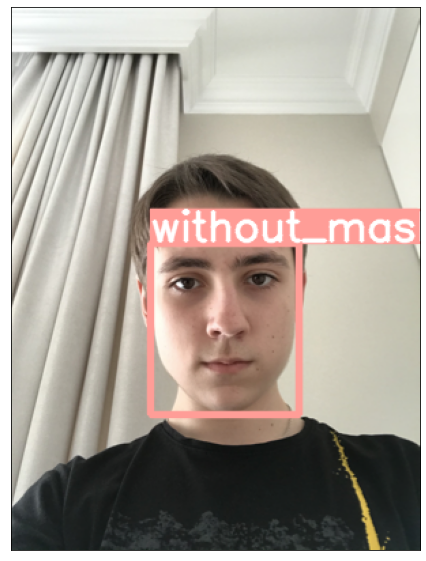

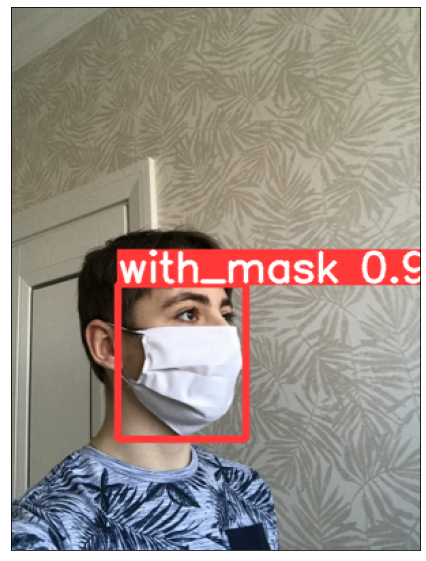

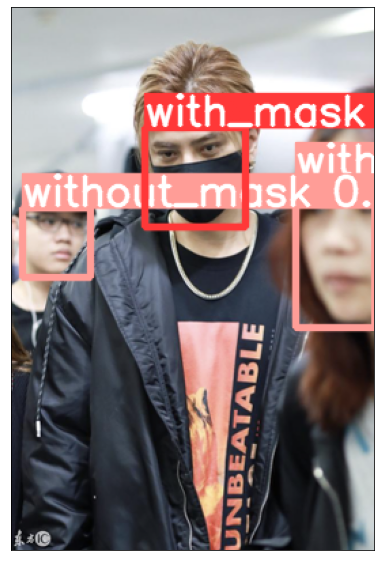

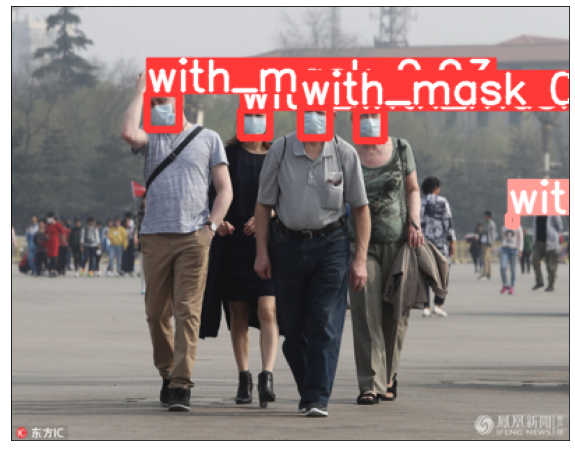

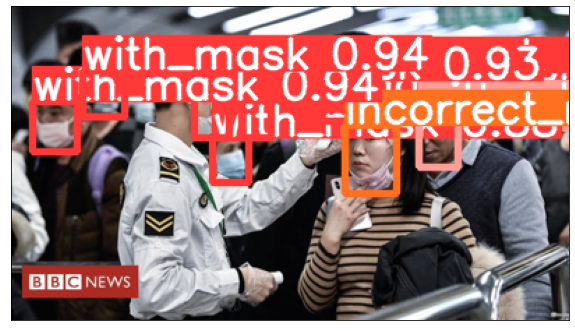

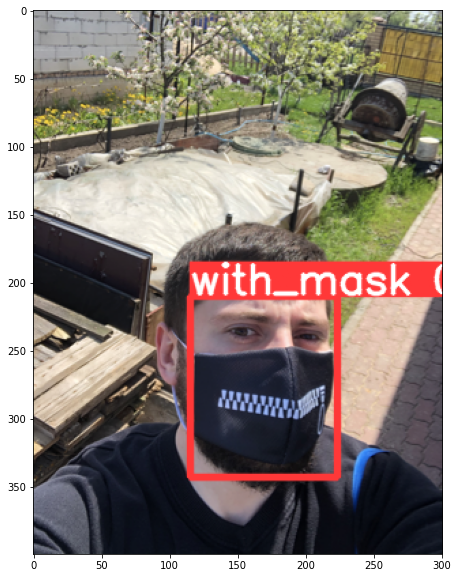

In [ ]:
show_images('runs/detect/exp')

In [ ]:
import torch
a = torch.ones((3,3)).cuda()